# RCT calculation
In this notebook we calculate the RCT for a specific part and also for a certain amount of parts (called as batch) and for different pictures as well

In [2]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 

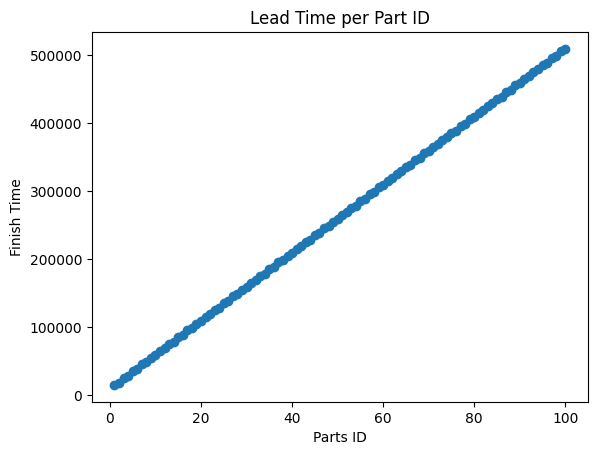

- Maximum Cycle Time: 35403
- Minimum Cycle Time: 15403
>>> Average system cycle time: 24975.15 [time unit]***


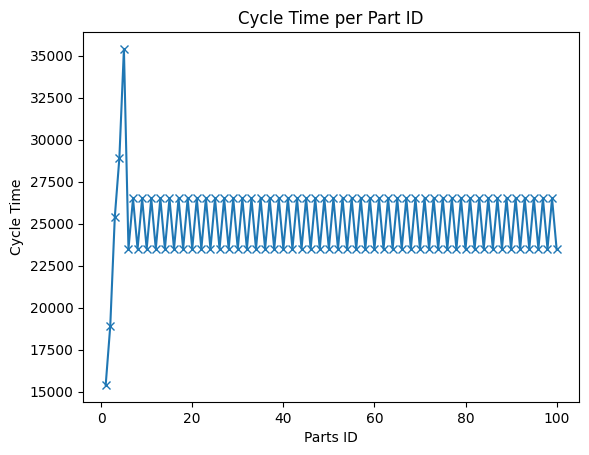

>>> System Throughput: 0.00019650110138867328 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [3]:
mydt = Digital_Twin(name="5s_deterministic")
mydt.run_digital_model(maxparts= 100)

In [4]:
mydt.run_sync()

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 

In [ ]:
mydt.run_validation()

In [ ]:
mydt.run_digital_model()

In [ ]:
mydt.run_sync()